## Решение задачи кредитного скоринга с помощью методов машинного обучения

Важной задачей, которую решает машинное обучение в банках - *предсказание дефолта*. *Дефолт* - это невозврат кредита заемщиком в установленный срок (обычно срок состовляет три месяца). 

Результат работы модели для конкретного клиента - предсказать произойдет дефолт или нет.

***
**Бизнес постановка задачи**

Банк по анкетным данным оценивает кредитоспособность потенциальных заёмщиков. Применение модели ясно:
* выдавать кредит только тем заемщикам, которые смогут его выплатить.
***

**Постановка задачи анализа данных**

Целью является построение модели для *классификации дефолтов*: на вход моель будет принимать данные о клиенте, а на выходе она должна выдавать следующие данные:
* вероятность дефолта для данного клиента,
* класс клиента (есть у него дефолт или нет).

***
**План анализа данных:**
* подключить необходимые библиотеки,
* загрузить и предобработать данные для обучения,
* обучить модель на обучающей выборке,
* загрузить и предобработать данные для тестирования,
* проанализировать результат работы модели.
***

### 1. Подключение библиотек

Для простоты работы с данными будем использовать библиотеку `pandas`, предназначенную для хранения, обработки и анализа данных.

In [1]:
import pandas as pd

Для визуализации исходных и полученных данных подключим библиотеку `matplotlib`, с помощью которой можно строить различные двумерные и трехмерные графики. 

In [2]:
import matplotlib.pyplot as plt

Подключим модуль `numpy`, который позволяет производить вычисления сразу над массивами чисел.

In [3]:
import numpy as np

Самая важная библиотека из всех что нам понадобятся - это `scikit-learn`. Она предоставляет широкий спектр инструментов для разработки и применения различных алгоритмов машинного обучения, включая классификацию, регрессию, кластеризацию, уменьшение размерности, отбор признаков и многое другое. Scikit-learn также предоставляет удобные средства для предобработки данных, оценки моделей и выбора оптимальных параметров.

Выберем из неё следующее:
* классификатор дерева решений - `DecisionTreeClassifier`;
* метод для кросс-валидации - `KFold`;
* несколько функций для расчёта метрик качества классификации.

In [4]:
# Классификатор дерева решений
from sklearn.tree import DecisionTreeClassifier

# k-fold кросс-валидация
from sklearn.model_selection import KFold

# Метрики качества:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import average_precision_score

### 2. Загрузка и предобработка данных

Мы будем использовать данные, которые состоят из двух частей: одна часть будет использоваться для обучения модели, вторая для тестирования.
Данные взяты из: ...

In [178]:
# Данные для обучения
training_data = pd.read_csv('training_data.csv')

# Данные для тестирования
test_data = pd.read_csv('test_data.csv')

Рассмотрим подробнее данные которые будем использовать для обучения:

In [179]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,50000.0,0.066860,0.249782,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,50000.0,7.927880,332.393142,0.0,0.030096,0.154426,0.555651,50708.0
age,50000.0,52.240520,14.766593,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,50000.0,0.428220,4.269296,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,50000.0,352.441921,2006.426016,0.0,0.176304,0.366811,0.862599,329664.0
MonthlyIncome,40147.0,6642.232222,18122.708690,0.0,3400.000000,5400.000000,8250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,50000.0,8.476040,5.172756,0.0,5.000000,8.000000,11.000000,57.0
NumberOfTimes90DaysLate,50000.0,0.269920,4.243110,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,50000.0,1.017500,1.120151,0.0,0.000000,1.000000,2.000000,32.0
NumberOfTime60-89DaysPastDueNotWorse,50000.0,0.246040,4.231055,0.0,0.000000,0.000000,0.000000,98.0


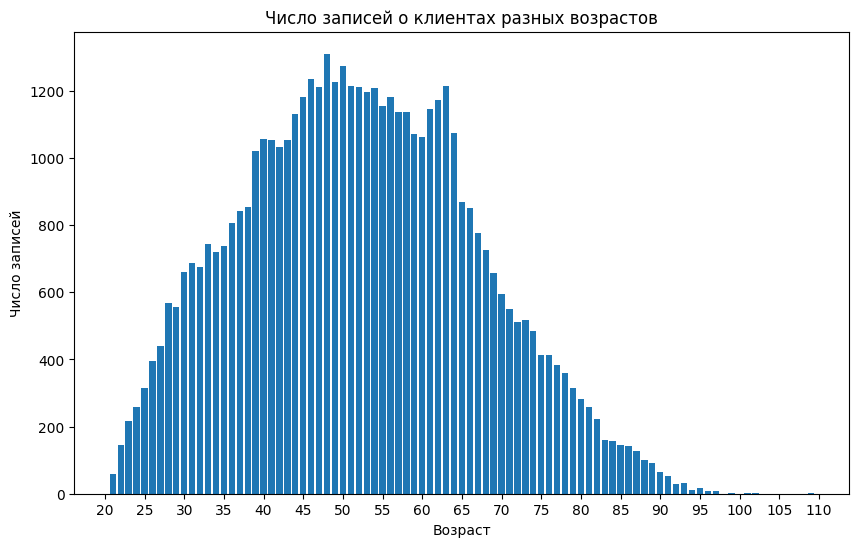

In [180]:
age_counts = pd.DataFrame(training_data['age'].value_counts().sort_index())
age_counts = age_counts.reset_index()
age_counts.columns = ['age', 'counts']

fig = plt.figure(figsize = (10, 6))

plt.bar(age_counts['age'], age_counts['counts'])
plt.xlabel('Возраст')
plt.ylabel('Число записей')
plt.title('Число записей о клиентах разных возрастов')
plt.xticks([x for x in range(20, 111, 5)])

plt.show()

Обратим внимание, что данных о клиентах возрастом менее 25 и более 65 лет гораздо меньше в сравнении с остальными. Это может негативно сказаться на точности работы обученной на данной выборке модели. Поэтому оставим в ней данные только о тех пользователях, возраст которых находится в пределах от 25 до 65 лет.

In [181]:
training_data = training_data[(training_data.age >= 25) & (training_data.age <= 65)]

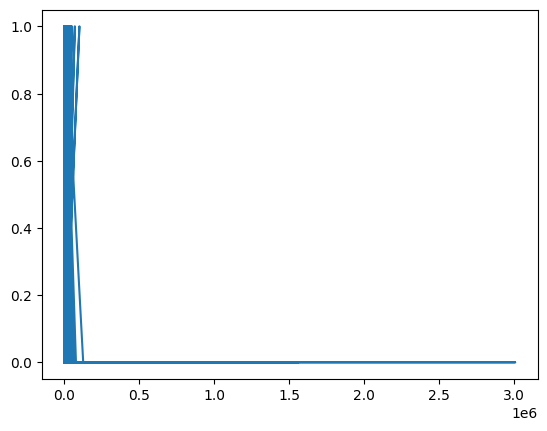

In [182]:
# Зависимость выплаты кредита от ЗП


Далее следует избавиться от пропусков. Для этого заполним их средним значением, полученным с помощью метода `mean()` (для каждого столбца такое значение будет разным).

In [143]:
training_data.fillna(training_data.mean(), inplace=True)

Проверим, все ли изменения внесены корректно:

In [144]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,39849.0,0.076062,0.265101,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,39849.0,8.801246,366.314895,0.0,0.041821,0.202134,0.622783,50708.0
age,39849.0,47.563979,10.685453,25.0,39.000000,48.000000,56.000000,65.0
NumberOfTime30-59DaysPastDueNotWorse,39849.0,0.429873,3.951556,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,39849.0,367.635109,2118.035210,0.0,0.199874,0.376297,0.783243,329664.0
MonthlyIncome,39849.0,6860.560448,18038.292424,0.0,4000.000000,6614.000000,7700.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,39849.0,8.584055,5.129077,0.0,5.000000,8.000000,11.000000,57.0
NumberOfTimes90DaysLate,39849.0,0.257171,3.920711,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,39849.0,1.091721,1.129576,0.0,0.000000,1.000000,2.000000,32.0
NumberOfTime60-89DaysPastDueNotWorse,39849.0,0.228161,3.904584,0.0,0.000000,0.000000,0.000000,98.0


Наша задача спрогнозировать дефолт, поэтому целевая переменная - наличие дефолта. В нашем случае целевой признак SeriousDlqin2yrs - это наличие серьёзной просрочки по платежу за последние 2 года.

In [145]:
target_var_name = 'SeriousDlqin2yrs'

Посчитаем количество плохих и хороших клиентов. Плохими будем называть клиентов у которых есть такая просрочка, хорошими - тех, у кого её нет.

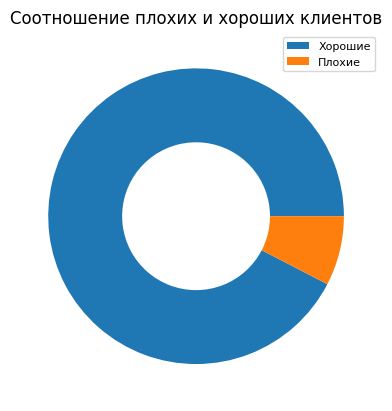

In [146]:
plt.title('Соотношение плохих и хороших клиентов')

plt.pie(training_data[target_var_name].value_counts(), wedgeprops=dict(width=0.5))

plt.legend(['Хорошие', 'Плохие'], prop={'size': 8})

plt.show()

***
На последнем этапе запишем столбец со значениями ключевой переменной `target_var_name` в новую переменную `target_column` и удалим его из массива данных `training_data`.
***

In [147]:
target_values = training_data[target_var_name]

training_data = training_data.drop(target_var_name, axis=1)

Проверим всё ли прошло успешно (должно остаться 10 столбцов):

In [148]:
training_data.shape

(39849, 10)

### 3. Обучение модели

***
Воспользуемся следующими методами для построения моделей классификации и сравним их между собой:
* логистическая регрессия
* случайный лес
***

Для корректной работы с методами нам понадобятся два модуля из вышеупомянутой библиотеки **sklearn**:
* `linear_model` - в нём находятся все линейные модели, в том числе модель логистической регрессии
* `ensemble` - в данном модуле находятся модели, основанные на ансамбле деревьев решений

In [124]:
from sklearn import linear_model, ensemble

Теперь можно приступать к созданию. Начнём с модели логистической регрессии, в конструкторе которой, установим значение макисмального числа итераций `max_iter` равным пятистам:

In [172]:
logictic_reg_model = linear_model.LogisticRegression(max_iter=500)

In [173]:
logictic_reg_model

LogisticRegression(max_iter=500)

***
Переходим к созданию модели случайного леса. У него есть множество параметров, наиболее важными из которых являются:
* `n_estimators` - количество деревьев в лесу,
* `max_depth` - максимальная глубина у дерева,
* `min_samples_leaf` - максимальное число объектов, которые могут попасть в лист дерева. 
***

Мы воспользуемся всего одним:

In [174]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=100)

In [175]:
random_forest_model

RandomForestClassifier()

Теперь, когда прототипы моделей уже созданы, можно приступить непосредственно к обучению модели. 

Для этого мы используем метод `fit()`, в который в качестве параметров нужно передать обучающую выборку и столбец значений ключевой переменной (в нашем случае: *training_data* и *target_values*):

In [176]:
logictic_reg_model.fit(training_data, target_values)

LogisticRegression(max_iter=500)

In [177]:
random_forest_model.fit(training_data, target_values)

RandomForestClassifier()